In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amirmotefaker/instagram-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\acer\.cache\kagglehub\datasets\amirmotefaker\instagram-data\versions\1


In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
import os
for file in os.listdir(path):
    print(file)

Instagram data.csv


In [5]:
csv_path = os.path.join(path, "Instagram data.csv")  # Replace 'filename.csv' with the actual file name
df = pd.read_csv(csv_path, encoding='ISO-8859-1')

In [6]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [7]:
len(df)

119

In [8]:
len(df.duplicated())

119

In [9]:
df = df.drop_duplicates()
df.reset_index(drop=True,inplace=True)

In [10]:
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [11]:
null_values = df.isnull().sum()
null_values

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

No way :o

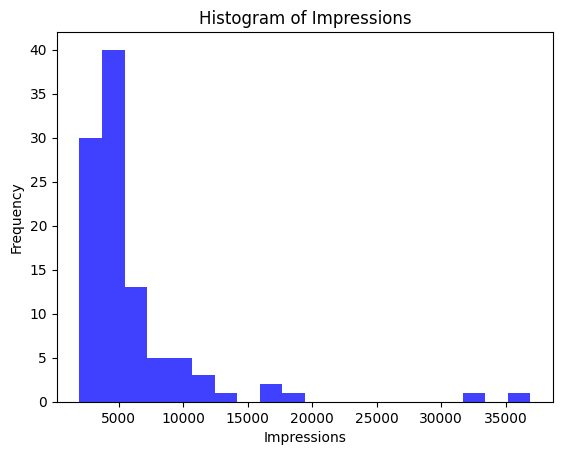

In [15]:
plt.hist(df['Impressions'], bins=20, alpha=0.75, color='b', label='Impressions')
plt.xlabel('Impressions')
plt.ylabel('Frequency')
plt.title('Histogram of Impressions')
plt.show()

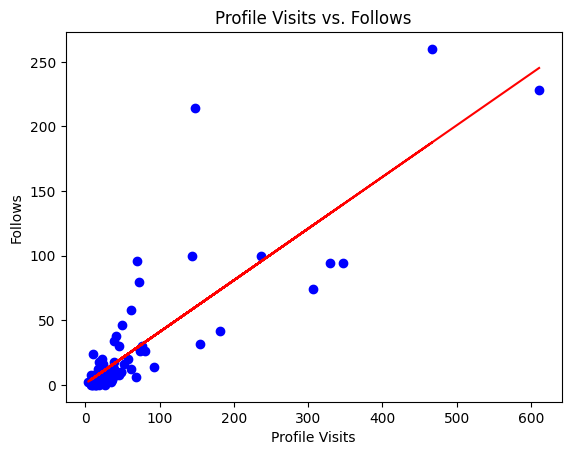

In [20]:
plt.scatter(df['Profile Visits'], df['Follows'], c='blue')
plt.xlabel('Profile Visits')
plt.ylabel('Follows')
plt.title('Profile Visits vs. Follows')

z = np.polyfit(df['Profile Visits'], df['Follows'], 1)
p = np.poly1d(z)
plt.plot(df['Profile Visits'], p(df['Profile Visits']), color='red')
plt.show()

In [ ]:
home = df["From Home"].sum()
hashtags = df["From Hashtags"].sum()
explore = df["From Explore"].sum()
other = df["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(df, values=values, names=labels, 
             title='Impressions on Instagram From Various Sources', hole=0.5)
fig.show()

## Start analyzing for nlp

In [45]:
df_for_nlp = df[['Caption', 'Hashtags', 'Impressions']]

In [46]:
df_for_nlp.head()

,Caption,Hashtags,Impressions
0,Here are some of the most important data visua...,#finance #money #business #investing #investme...,3920
1,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,5394
2,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,4021
3,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,4528
4,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,2518


In [47]:
len(df_for_nlp)

102

In [48]:
df_for_nlp['Hashtags'] = df_for_nlp['Hashtags'].str.replace('#', '')
df_for_nlp.rename(columns={'Hashtags': 'Hashtags keywords'}, inplace=True)
df_for_nlp.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_19480\3228472098.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_19480\3228472098.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Caption,Hashtags keywords,Impressions
0,Here are some of the most important data visua...,finance money business investing investment tr...,3920
1,Here are some of the best data science project...,healthcare health covid data datascience dataa...,5394
2,Learn how to train a machine learning model an...,data datascience dataanalysis dataanalytics da...,4021
3,Heres how you can write a Python program to d...,python pythonprogramming pythonprojects python...,4528
4,Plotting annotations while visualizing your da...,datavisualization datascience data dataanalyti...,2518


In [50]:
import re

df_for_nlp['Caption'] = df_for_nlp['Caption'].str.lower().apply(lambda x: re.sub(r'[^a-z\s]', '', x))
df_for_nlp.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_19480\4255652326.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Caption,Hashtags keywords,Impressions
0,here are some of the most important data visua...,finance money business investing investment tr...,3920
1,here are some of the best data science project...,healthcare health covid data datascience dataa...,5394
2,learn how to train a machine learning model an...,data datascience dataanalysis dataanalytics da...,4021
3,heres how you can write a python program to de...,python pythonprogramming pythonprojects python...,4528
4,plotting annotations while visualizing your da...,datavisualization datascience data dataanalyti...,2518


In [51]:
df_for_nlp.head()

,Caption,Hashtags keywords,Impressions
0,here are some of the most important data visua...,finance money business investing investment tr...,3920
1,here are some of the best data science project...,healthcare health covid data datascience dataa...,5394
2,learn how to train a machine learning model an...,data datascience dataanalysis dataanalytics da...,4021
3,heres how you can write a python program to de...,python pythonprogramming pythonprojects python...,4528
4,plotting annotations while visualizing your da...,datavisualization datascience data dataanalyti...,2518


In [53]:
df_for_nlp.to_csv('data/df_for_nlp.csv', index=False)

In [55]:
df = pd.read_csv('data/df_for_nlp.csv')

In [56]:
df.sample(5)

,Caption,Hashtags keywords,Impressions
53,here are some of the best data science project...,data datascience dataanalysis dataanalytics da...,6432
13,heres how to visualize an interactive candlest...,stockmarket investing stocks trading money inv...,3216
88,here are some of the best data science project...,data datascience dataanalysis dataanalytics da...,11068
66,to calculate the execution time of the program...,python pythonprogramming pythonprojects python...,3818
38,language detection is a natural language proce...,data datascience dataanalysis dataanalytics da...,2191
